# Sourcing Weather Data

In [19]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Hourly
from meteostat import Stations
import os
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

### Set the constants

In [30]:
# Set time period for sourcing the data
start_time = datetime(2017, 1, 1)
end_time = datetime(2024, 7, 31)

# Coordinates of the Entry point of the Bavarian Forest National Park

entry_lat = 48.9945849
entry_lon = 13.379928136136467

# Coordinates of a higher elevation point in the Bavarian Forest National Park

peak_lat = 49.08485
peak_lon = 13.16001

# Create a point over the Bavarian Forest National Park entry
bavarian_forest = Point(entry_lat,entry_lon)

# Create a point over the Bavarian Forest National Park peak
bavarian_peak = Point(49.08485, 13.16001)


## Source historical weather data for a given time period

In [20]:
def get_stations_nearby(lat, lon,station_count):

    """
    Get the nearby weather stations for the given latitude and longitude

    Parameters:
    ----------  
    lat : float
        Latitude of the location
    lon : float
        Longitude of the location

    Returns:
    -------
    stations : list
        List of nearby weather stations

    """

    ## Uncomment the filters you don't need
    
    # Get nearby weather stations
    stations = Stations()

    # Get the German and Czech weather stations
    stations = stations.region('DE') or stations.region('CZ')

    # Set bounds for the weather stations
    stations = stations.bounds((49.211930, 12.915659),(48.842572, 13.909340))
    
    # Get the nearby stations for the given latitide and longitude
    stations = stations.nearby(lat,lon)

    # Fetch nearby stations 
    stations = stations.fetch(station_count, sample=True)

    return stations

### Get hourly weather data for a given location and time period

In [6]:
def get_hourly_data(region, start_date, end_date):

    """
    Get the hourly weather data for the given station, start date and end date

    Parameters:
    ----------  
    station : str
        Station ID/point
    start_date : str
        Start date in the format 'YYYY-MM-DD'
    end_date : str
        End date in the format 'YYYY-MM-DD'

    Returns:
    -------
    data : pandas.DataFrame
        Hourly weather data

    """


    # Get hourly data
    data = Hourly(region, start_date, end_date)
    # See about the dataframe columns here : https://dev.meteostat.net/python/daily.html#data-structure
    data = data.fetch()

    return data

In [ ]:
# Uncomment the below lines if you want to manually specify the nearby weather stations


# Get nearby weather stations : If you want to get the nearby weather stations, uncomment the below line
# stations,count = get_stations_nearby(lat, lon, 3)

# filter the columns where distance is less than 300 kms : If you want to filter the stations based on distance, uncomment the below line
# stations = stations[stations['distance'] < 300000]

## Experiments

### Source data from the chosen nearby stations

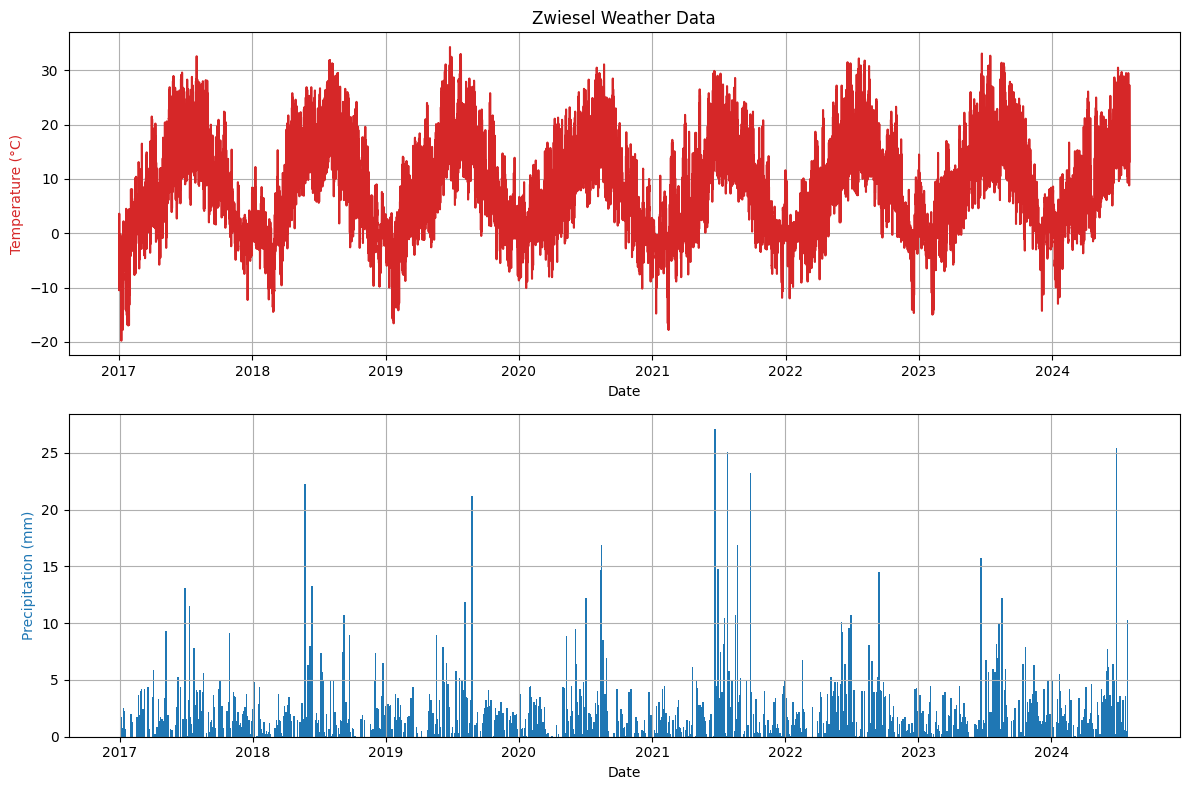

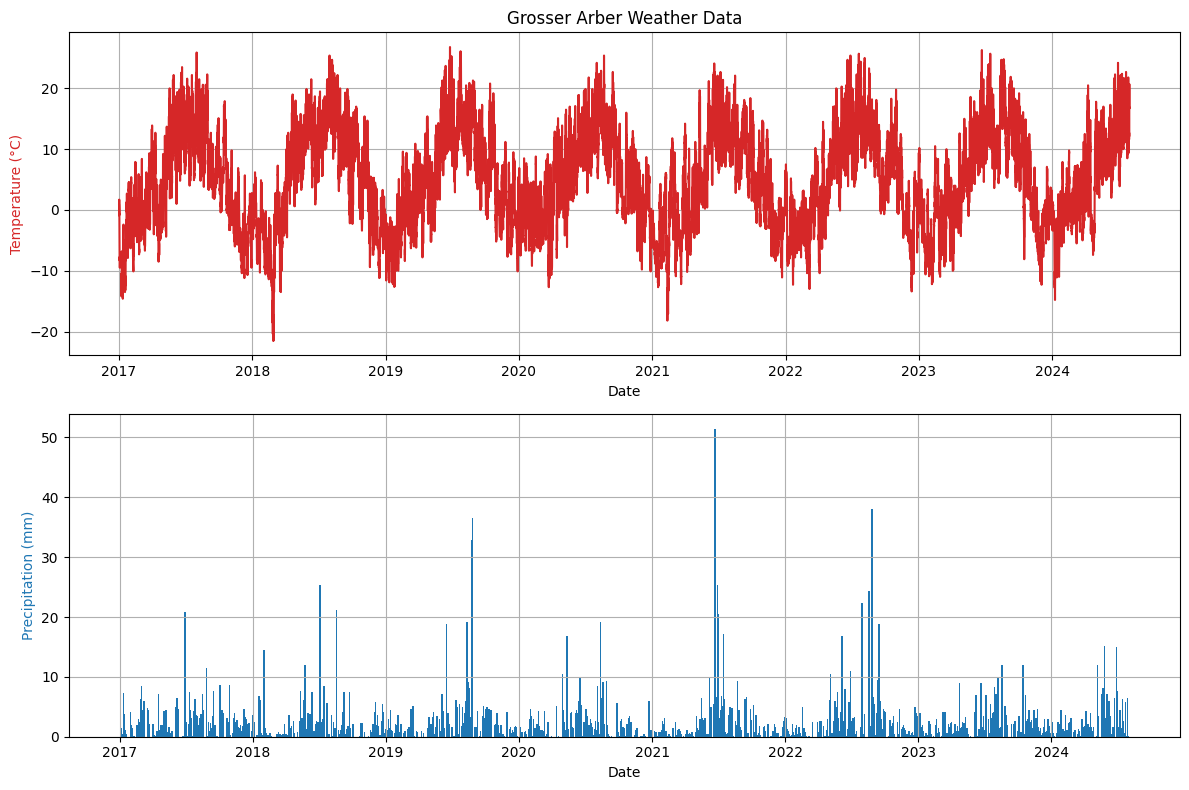

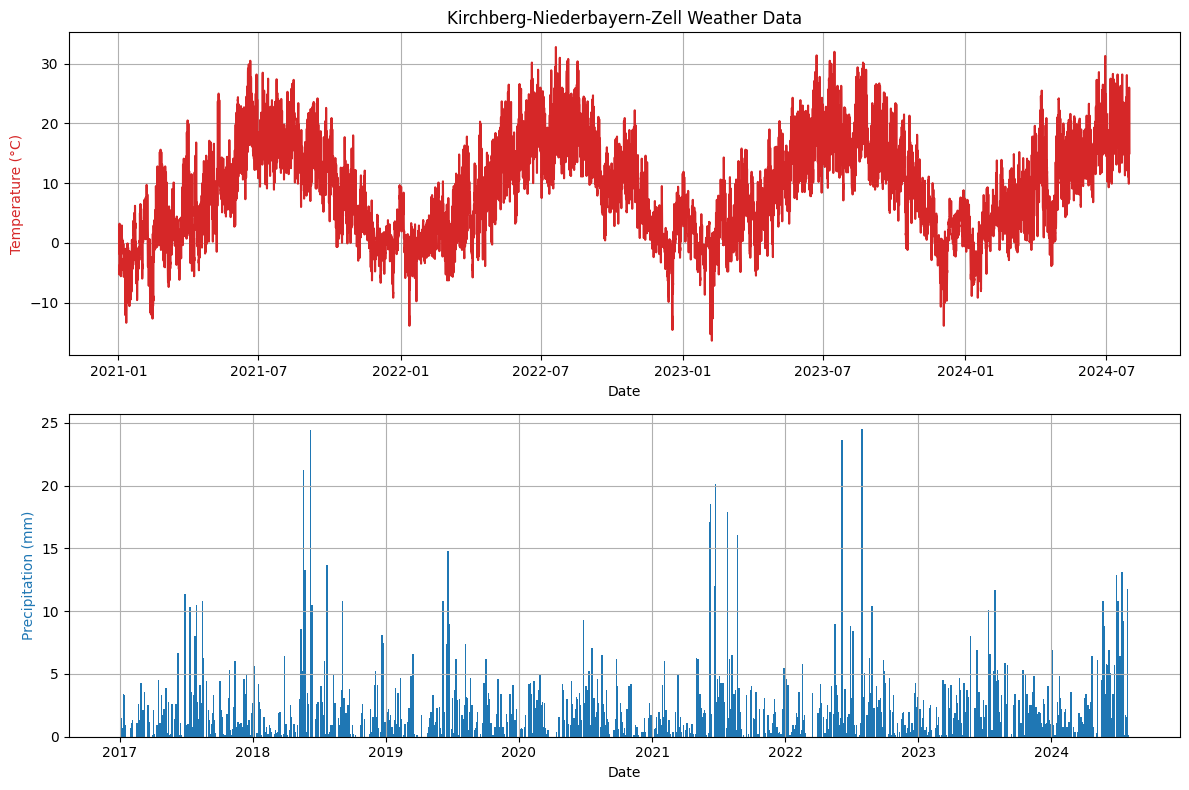

In [18]:
extracted_stations = {'10796' : 'Zwiesel', '10791' : 'Grosser Arber', 'D6191':'Kirchberg-Niederbayern-Zell' }

for station_id, station_name in extracted_stations.items():
    # Get hourly weather data
    data = get_hourly_data(station_id, start_time, end_time)
    
    # save as csv file
    save_path = './outputs/weather_data/'
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    data.to_csv(f'{save_path}{station_name}.csv')

    # Plot temperature and precipitation data in subplots
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))

    # Plot temperature data
    ax[0].plot(data.index, data['temp'], color='tab:red')
    ax[0].set_ylabel('Temperature (°C)', color='tab:red')
    ax[0].set_title(f'{station_name} Weather Data')
    ax[0].grid(True)
    ax[0].set_xlabel('Date')

    # Plot precipitation data

    ax[1].bar(data.index, data['prcp'], color='tab:blue', width= 4)
    ax[1].set_ylabel('Precipitation (mm)',color='tab:blue')
    ax[1].grid(True)
    ax[1].set_xlabel('Date')

    # Show plot
    plt.tight_layout()
    plt.show()

### Source data from the bavarian national park entry point

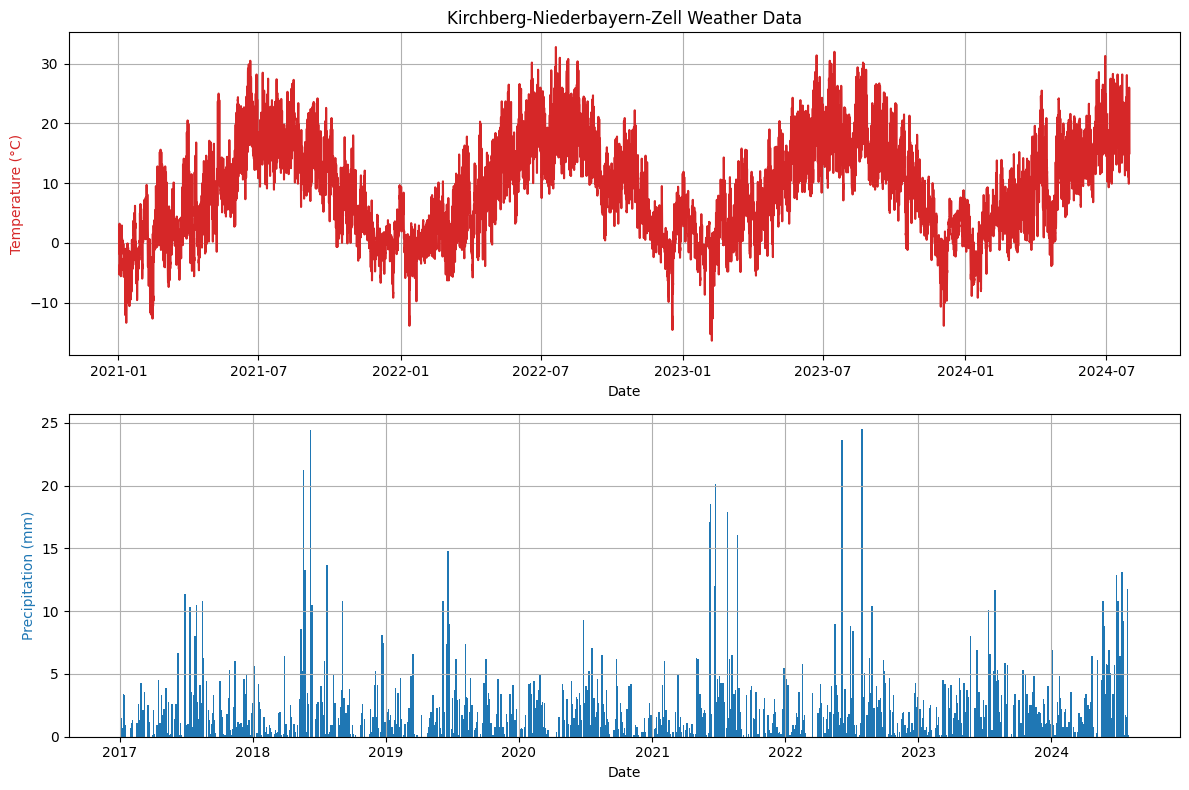

In [26]:
get_hourly_data(bavarian_forest, start_time, end_time)

save_path = './outputs/weather_data/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

data.to_csv(f'{save_path}bf-entry-point.csv')

# Plot temperature and precipitation data in subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot temperature data
ax[0].plot(data.index, data['temp'], color='tab:red')
ax[0].set_ylabel('Temperature (°C)', color='tab:red')
ax[0].set_title(f'{station_name} Weather Data')
ax[0].grid(True)
ax[0].set_xlabel('Date')

# Plot precipitation data

ax[1].bar(data.index, data['prcp'], color='tab:blue', width= 4)
ax[1].set_ylabel('Precipitation (mm)',color='tab:blue')
ax[1].grid(True)
ax[1].set_xlabel('Date')

# Show plot
plt.tight_layout()
plt.show()

### Source data from the bavarian national park peak point

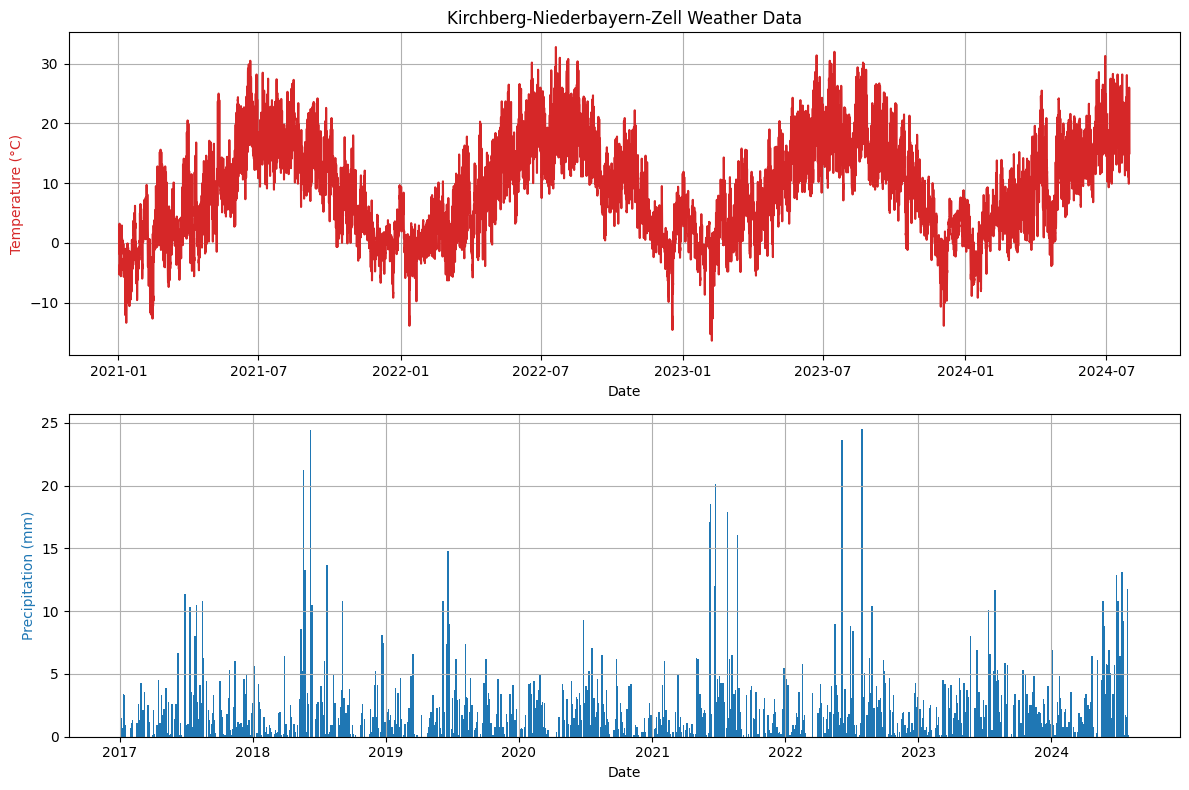

In [29]:
get_hourly_data(bavarian_peak, start_time, end_time)

save_path = './outputs/weather_data/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

data.to_csv(f'{save_path}bf-peak_region.csv')

# Plot temperature and precipitation data in subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot temperature data
ax[0].plot(data.index, data['temp'], color='tab:red')
ax[0].set_ylabel('Temperature (°C)', color='tab:red')
ax[0].set_title(f'{station_name} Weather Data')
ax[0].grid(True)
ax[0].set_xlabel('Date')

# Plot precipitation data

ax[1].bar(data.index, data['prcp'], color='tab:blue', width= 4)
ax[1].set_ylabel('Precipitation (mm)',color='tab:blue')
ax[1].grid(True)
ax[1].set_xlabel('Date')

# Show plot
plt.tight_layout()
plt.show()